**Regression** problems involve the prediction of a continuous, numeric value from a set of characteristics.

In this example, we'll build a model to predict house prices from characteristics like the number of rooms and the crime rate at the house location.

## Reading data

We'll be using the **pandas** package to read data.

Pandas is an open source library that can be used to read formatted data files into tabular structures that can be processed by python scripts.

In [1]:
# Make sure you have a working installation of pandas by executing this cell
import pandas as pd

In this exercise, we'll use the [Boston Housing dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) to predict house prices from characteristics like the number of rooms and distance to employment centers.

In [2]:
boston_housing_data = pd.read_csv('datasets/boston.csv')

Pandas allows reading our data from different file formats and sources. See [this link](http://pandas.pydata.org/pandas-docs/stable/io.html) for a list of supported operations.

In [3]:
boston_housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
boston_housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualizing data

After reading our data into a pandas DataFrame and getting a broader view of the dataset, we can build charts to visualize tha "shape" of the data.

We'll use python's *Matplotlib* library to create these charts.

In [6]:
import matplotlib.pyplot as plt
# This line makes the graphs appear as cell outputs rather than in a separate window or file.
%matplotlib inline

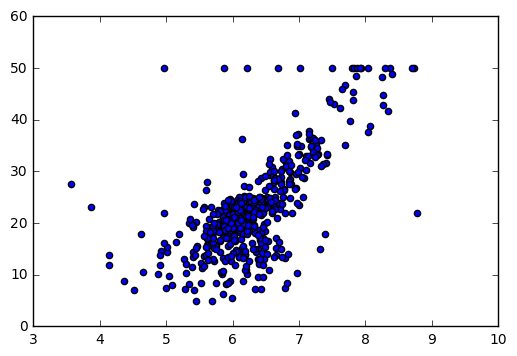

In [7]:
# Extract the house prices and average number of rooms to two separate variables
prices = boston_housing_data.medv
rooms = boston_housing_data.rm

# Create a scatterplot of these two properties using plt.scatter()
# Specify labels for the X and Y axis
# Show graph
plt.scatter(rooms, prices)
plt.show()

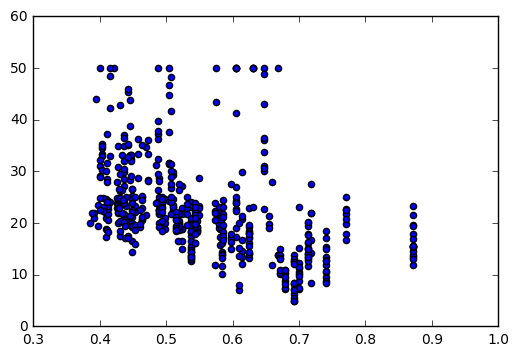

In [8]:
# Extract the house prices and average number of rooms to two separate variables
prices = boston_housing_data.medv
nox = boston_housing_data.nox

# Create a scatterplot of these two properties using plt.scatter()
# Specify labels for the X and Y axis
# Show graph
plt.scatter(nox, prices)
plt.show()

## Predicting house prices

We could see in the previous graphs that some features have a roughy linear relationship to the house prices. We'll use [Scikit-Learn's LinearRegression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to model this data and predict house prices from other information.

The example below builds a LinearRegression model using the average number of rooms to predict house prices:

In [9]:
from sklearn.linear_model import LinearRegression

x = boston_housing_data.rm.values.reshape(-1, 1)
y = boston_housing_data.medv.values.reshape(-1, 1)

lr = LinearRegression().fit(x, y)

lr.predict(6)

array([[ 19.94203311]])

We'll now use all the features in the dataset to predict house prices.

Let's start by splitting our data into a *training* set and a *validation* set. The training set will be used to train our linear model; the validation set, on the other hand, will be used to assess how accurate our model is.

In [10]:
X = boston_housing_data.drop('medv', axis=1)
t = boston_housing_data.medv.values.reshape(-1, 1)

In [11]:
# Use sklean's train_test_plit() method to split our data into two sets.
# See http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split
from sklearn.cross_validation import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, t)

In [12]:
# Use the training set to build a LinearRegression model
lr = LinearRegression().fit(Xtr, ytr)

In [13]:
# Use the validation set to assess the model's performance.
# See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

mean_squared_error(yts, lr.predict(Xts))

21.286461358848804

What kind of enhancements could be done to get better results?

In [15]:
# The outlier
boston_housing_data[(boston_housing_data.rm < 5.5)][(boston_housing_data.medv > 40.0)]

/Users/fmmartin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
368,4.89822,0.0,18.1,0,0.631,4.97,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
